In [33]:
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
PATH = "../fio/randread"
EXT = "*.log"

In [35]:
#load data
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [36]:
all_csv_files.sort()
all_csv_files

['../fio/randread/trace_randread16B_bw.log',
 '../fio/randread/trace_randread16B_lat.log',
 '../fio/randread/trace_randread4B_bw.log',
 '../fio/randread/trace_randread4B_lat.log',
 '../fio/randread/trace_randread64B_bw.log',
 '../fio/randread/trace_randread64B_lat.log']

In [37]:
#read csv data 
#pd.options.display.float_format = '{:.6f}'.format
#date d'arrivée --> milliseconde
#bw/lat---> KiB/sec|nanoseconde 
#type---> read=0|write=1 
#taille/offset---> Bytes
df_read = [pd.read_csv(file, delimiter=",", names=["date", "bw|lat", "type","taille", "offset", "prio"]) 
                                             for file in all_csv_files]

In [38]:
df_read[0].columns

Index(['date', 'bw|lat', 'type', 'taille', 'offset', 'prio'], dtype='object')

In [39]:
#Bandwiths respectivements pour les tailles 4B, 16B, 64B
df_read_bw = [df_read[2], df_read[0],df_read[4]]



df_read_bw[1].head()

,date,bw|lat,type,taille,offset,prio
0,0,80,0,16,60304,0
1,0,119,0,16,740288,0
2,0,134,0,16,843168,0
3,1,128,0,16,470000,0
4,1,133,0,16,401904,0


In [40]:
#convertisseur 
ms_to_sec = 1e-3
ns_to_sec = 1e-9
kib_to_kb = 1.024

**Representations graphiques des latences pour les différentes tailles**

In [55]:
#Latence respectivements pour les tailles 4B, 16B, 64B
df_read_lat = [df_read[3], df_read[1],df_read[5]]

In [57]:
pd.options.display.float_format = '{:.8f}'.format
(df_read_lat[0]["bw|lat"].describe())*ns_to_sec

count   0.00025000
mean    0.00000163
std     0.00000411
min     0.00000115
25%     0.00000124
50%     0.00000126
75%     0.00000142
max     0.00041848
Name: bw|lat, dtype: float64

In [41]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_read_lat_mean = [df.groupby(["date"], as_index=False).mean() for df in df_read_lat]
df_read_lat_mean[0].tail()

,date,bw|lat,type,taille,offset,prio
782,782,1275.588235,0.0,4.0,491702.438503,0.0
783,783,1293.425926,0.0,4.0,487866.158730,0.0
784,784,1205.317618,0.0,4.0,542371.215881,0.0
785,785,1185.122353,0.0,4.0,411746.305882,0.0
786,786,1172.236364,0.0,4.0,298030.400000,0.0


In [42]:
#données des lectures aléatoires par une taille de 4 bytes
begin_time_lat4 = df_read_lat_mean[0]["date"][0]
x_lat4 = (df_read_lat_mean[0]["date"] - begin_time_lat4)*ms_to_sec
y_lat4 = (df_read_lat_mean[0]["bw|lat"])*ns_to_sec
y_lat4.head()

0    0.000185
1    0.000112
2    0.000127
3    0.000132
4    0.000094
Name: bw|lat, dtype: float64

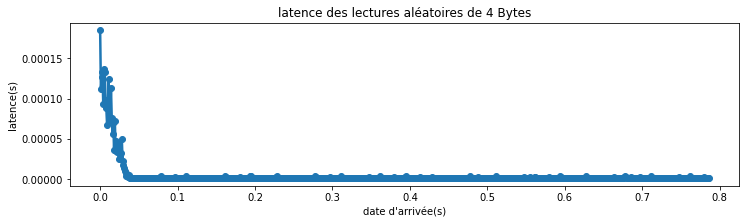

In [43]:
#plot des latences des lectures aléatoires par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat4, y_lat4, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des lectures aléatoires de 4 Bytes')
plt.savefig("../outplot_fio/read/rand/latence/read4B.png")
plt.show()

In [44]:
#données des lectures aléatoires par une taille de 16 bytes
begin_time_lat16 = df_read_lat_mean[1]["date"][0]
x_lat16 = (df_read_lat_mean[1]["date"] - begin_time_lat16)*ms_to_sec
y_lat16 = (df_read_lat_mean[1]["bw|lat"])*ns_to_sec
y_lat16.head()

0    0.000151
1    0.000112
2    0.000120
3    0.000135
4    0.000105
Name: bw|lat, dtype: float64

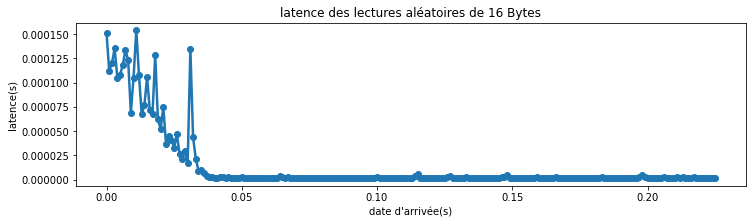

In [45]:
#plot des données des lectures seq par une taille de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat16, y_lat16, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des lectures aléatoires de 16 Bytes')
plt.savefig("../outplot_fio/read/rand/latence/read16B.png")
plt.show()

In [46]:
#données des lectures aléatoires par une taille de 64 bytes
begin_time_lat64 = df_read_lat_mean[2]["date"][0]
x_lat64 = (df_read_lat_mean[2]["date"] - begin_time_lat64)*ms_to_sec
y_lat64 = (df_read_lat_mean[2]["bw|lat"])*ns_to_sec
y_lat64.head()

0    0.000226
1    0.000135
2    0.000148
3    0.001203
4    0.000212
Name: bw|lat, dtype: float64

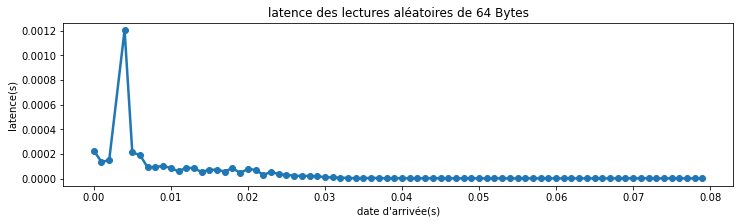

In [47]:
#plot des données des lectures aléatoires par une taille de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat64, y_lat64, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des lectures aléatoires de 64 Bytes')
plt.savefig("../outplot_fio/read/rand/latence/read64B.png")
plt.show()

**Representations graphiques des bandwiths pour les différentes tailles**

In [48]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_read_bw_mean = [df.groupby(["date"], as_index=False).mean() for df in df_read_bw]
df_read_bw_mean[0].head()

,date,bw|lat,type,taille,offset,prio
0,0,22.500000,0.0,4.0,400300.000000,0.0
1,1,136.666667,0.0,4.0,569365.777778,0.0
2,2,31.285714,0.0,4.0,574721.142857,0.0
3,3,30.285714,0.0,4.0,457665.142857,0.0
4,4,269.545455,0.0,4.0,482446.181818,0.0


In [49]:
#données(bw) des lectures aléatoires par une taille de 4 bytes
begin_time_bw4 = df_read_bw_mean[0]["date"][0]
x_bw4 = (df_read_bw_mean[0]["date"] - begin_time_bw4)*ms_to_sec
y_bw4 = (df_read_bw_mean[0]["bw|lat"])*kib_to_kb
y_bw4.head()

0     23.040000
1    139.946667
2     32.036571
3     31.012571
4    276.014545
Name: bw|lat, dtype: float64

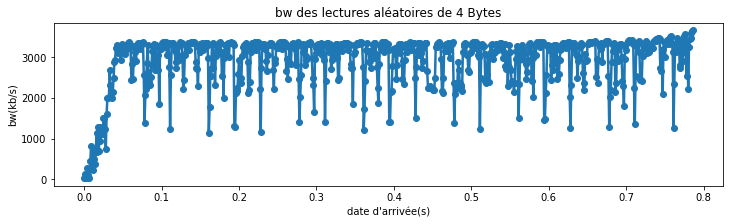

In [50]:
#plot des bw des lectures aléatoires par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw4, y_bw4, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures aléatoires de 4 Bytes')
plt.savefig("../outplot_fio/read/rand/bw/read4B.png")
plt.show()

In [51]:
#données(bw) des lectures aléatoires par une taille de 16 bytes
begin_time_bw16 = df_read_bw_mean[1]["date"][0]
x_bw16 = (df_read_bw_mean[1]["date"] - begin_time_bw16)*ms_to_sec
y_bw16 = (df_read_bw_mean[1]["bw|lat"])*kib_to_kb
y_bw16.head()

0    113.664000
1    598.926222
2    136.576000
3    512.000000
4    894.065778
Name: bw|lat, dtype: float64

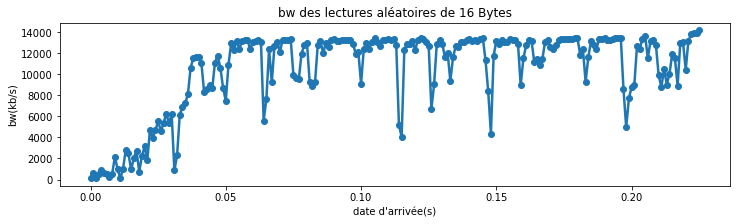

In [52]:
#plot des bw des lectures seq par un pas de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw16, y_bw16, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures aléatoires de 16 Bytes')
plt.savefig("../outplot_fio/read/rand/bw/read16B.png")
plt.show()

In [53]:
#données(bw) des lectures aléatoires par une taille de 64 bytes
begin_time_bw64 = df_read_bw_mean[2]["date"][0]
x_bw64 = (df_read_bw_mean[2]["date"] - begin_time_bw64)*ms_to_sec
y_bw64 = (df_read_bw_mean[2]["bw|lat"])*kib_to_kb
y_bw64.head()

0     290.8160
1    1584.1280
2     445.4400
3      76.8000
4     323.9936
Name: bw|lat, dtype: float64

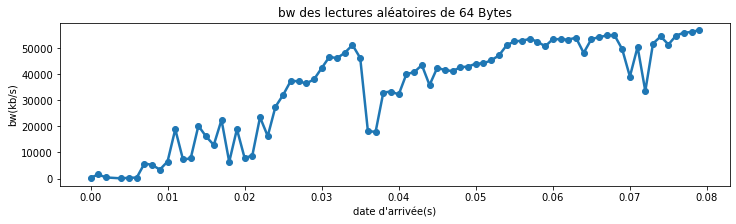

In [54]:
#plot des bw des lectures seq par un pas de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw64, y_bw64, "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures aléatoires de 64 Bytes')
plt.savefig("../outplot_fio/read/rand/bw/read64B.png")
plt.show()